In [9]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
def apply_oil_painting_effect(input_image_path, output_image_path):
    # Read the image
    original_image = cv2.imread(input_image_path)
    # i want to show mmore than one image
    plt.subplot(1,2,1)
    plt.imshow(original_image)
    plt.title('original image')

    # Check if image is loaded
    if original_image is None:
        print("Can't read the image file.")
        return

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Apply gaussian blur to the grayscale image
    blurred_image = cv2.GaussianBlur(gray_image, (21, 21), 0)

    # Detect edges in the image and invert the binary image
    edges = cv2.adaptiveThreshold(blurred_image, 255,
                                  cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY, 9, 9)

    # Convert back to color
    colored_edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    # Create the 'oil painting' effect by bitwise_and operation with the inverted edges
    oil_painting_effect = cv2.bitwise_and(original_image, colored_edges)
    plt.subplot(1,2,2)
    plt.imshow(oil_painting_effect)
    plt.title('oil painting effect')
    # Save the final image
    cv2.imwrite(output_image_path, oil_painting_effect)

    print(f"Saved: {output_image_path}")



Saved: cameraman_oil_painting_effect.jpg


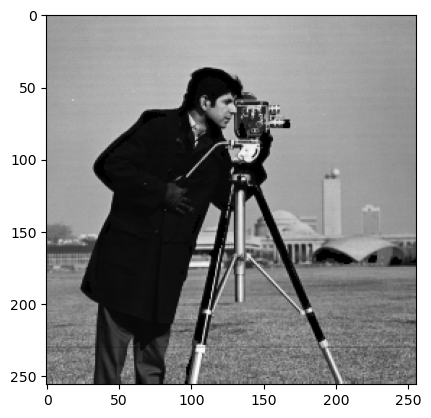

In [10]:
# Using the function
input_file = 'cameraman.tif'  # change to your image file path
output_file = 'cameraman_oil_painting_effect.jpg'  # where you want to save the output
apply_oil_painting_effect(input_file, output_file)